In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import mne
import pandas as pd

/home/braedyn/anaconda3/lib/python3.7/site-packages/numba/decorators.py:146: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


In [2]:
layout = mne.channels.read_custom_montage('./AdultAverageNet64_v1.sfp')

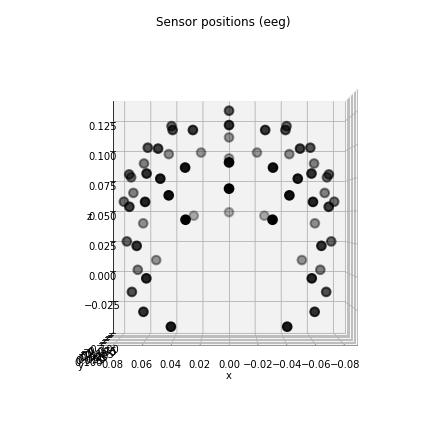

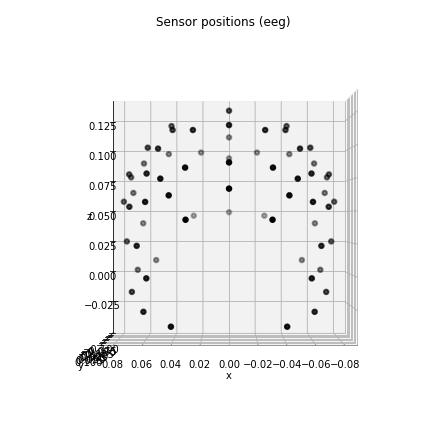

In [10]:
layout.plot()

In [12]:
help(layout)

Help on DigMontage in module mne.channels.montage object:

class DigMontage(builtins.object)
 |  DigMontage(hsp=<object object at 0x7f04563812c0>, hpi=<object object at 0x7f04563812c0>, elp=<object object at 0x7f04563812c0>, point_names=<object object at 0x7f04563812c0>, nasion=<object object at 0x7f04563812c0>, lpa=<object object at 0x7f04563812c0>, rpa=<object object at 0x7f04563812c0>, dev_head_t=None, dig_ch_pos=<object object at 0x7f04563812c0>, dig=None, ch_names=None)
 |  
 |  Montage for digitized electrode and headshape position data.
 |  
 |  .. warning:: Montages are typically created using one of the helper
 |               functions in the ``See Also`` section below instead of
 |               instantiating this class directly.
 |  
 |  Parameters
 |  ----------
 |  hsp : array, shape (n_points, 3)
 |      The positions of the headshape points in 3d.
 |      These points are in the native digitizer space.
 |      Deprecated, will be removed in 0.20.
 |  hpi : array, shape 

In [7]:
import pandas as pd


In [22]:
print(layout.hsp(''))

<ipython-input-22-277d7e32a370>:1: DeprecationWarning: "hsp" attribute is deprecated and will be removed in v0.20
  print(layout.hsp('AdultAverageNet64_v1.svp'))


TypeError: 'NoneType' object is not callable

In [8]:
a = np.asarray(pd.read_csv("./AdultAverageNet64_v1.sfp", header=None, sep='\t'))

In [9]:
b = a[3:-1]

In [10]:
x = []
y = []
z = []
for i  in b:
    x.append(i[1])
    y.append(i[2])
    z.append(i[3])

In [11]:
type(b[0][1:4])

numpy.ndarray

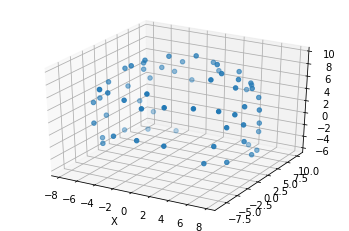

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.xlabel("X")
ax.scatter(x, y, z)

In [13]:
# np.savetxt('eegXs.txt', x, delimiter = ',')
# np.savetxt('eegYs.txt', y, delimiter = ',')
# np.savetxt('eegZs.txt', z, delimiter = ',')

In [14]:
# np.savetxt('eegXsINT.txt', np.int_(x), delimiter = ',')
# np.savetxt('eegYsINT.txt', np.int_(y), delimiter = ',')
# np.savetxt('eegZsINT.txt', np.int_(z), delimiter = ',')

In [27]:
particlePositions = np.asarray([])
for i in b:
     particlePositions = np.append(particlePositions,[i[2], i[3], i[1]])

In [32]:
50*particlePositions

array([ 345.4275 , -108.0558 ,  293.09845,  428.5036 ,  222.51055,
        211.2683 ,  401.32845,  326.11955,  154.05345,  228.13865,
        474.6509 ,    0.     ,  507.8901 ,  138.24   ,  151.2979 ,
        433.864  ,  348.98165,    0.     ,  190.80705,  452.471  ,
       -129.1932 ,  503.06   ,  255.9861 ,    0.     ,  401.32845,
        326.11955, -154.05345,  507.8901 ,  138.24   , -151.2979 ,
        428.5036 ,  222.51055, -211.2683 ,  344.60505,  277.9197 ,
       -242.462  ,  320.04905,  185.5654 , -297.1162 ,  241.76245,
        287.5288 , -293.78475,  162.52825,  377.37565, -254.53385,
         76.16335,  443.00115, -203.9308 ,  345.4275 , -108.0558 ,
       -293.09845,  262.0568 ,    7.61895, -329.411  ,  188.99405,
        151.99895, -357.46425,   36.9857 ,  369.69605, -294.9958 ,
        -61.8389 ,  447.2649 , -210.45395,  -10.319  ,  259.02395,
       -364.52975,  126.0941 , -192.40355, -351.83965,  -27.05625,
        -11.1018 , -374.6749 ,  -67.35775,  143.86105, -386.35

In [15]:
# np.savetxt('particlePositions.txt',particlePositions, delimiter = ',')

In [46]:
np.concatenate((np.random.choice(np.arange(64), 2, replace=False), np.asarray([np.random.random()])))

array([43.        , 13.        ,  0.54864922])

In [43]:
np.random.random()

0.7098598961852152

In [8]:
randNetwork = pd.DataFrame(columns =  ['node1', 'node2', 'weight'])
turn = 0
while turn < 500:
    weights = np.concatenate((np.random.choice(np.arange(64), 2, replace=False), np.asarray([np.random.random()])))
    wpd = pd.DataFrame([weights],columns =  ['node1', 'node2', 'weight'])
    randNetwork = randNetwork.append(wpd)
    turn += 1
randNetwork.to_csv("./randNetwork10.csv")

In [83]:
randNetwork

node1  node2    weight
0     5.0   36.0  0.485707
0    63.0   12.0  0.289508
0    36.0   61.0  0.882621
0    35.0   50.0  0.124474
0    29.0   18.0  0.850528
..    ...    ...       ...
0    21.0   63.0  0.566692
0    35.0   30.0  0.096305
0    36.0   42.0  0.187289
0     5.0   17.0  0.077099
0    54.0   35.0  0.681093

[500 rows x 3 columns]

In [84]:
randNetwork.to_csv("./randNetwork.csv")

In [92]:
for row in randNetwork.iterrows():
    print(row[1]['node2'])

36.0
12.0
61.0
50.0
18.0
3.0
19.0
27.0
24.0
60.0
63.0
32.0
30.0
57.0
15.0
24.0
7.0
62.0
47.0
45.0
42.0
38.0
38.0
51.0
19.0
26.0
16.0
37.0
56.0
31.0
16.0
59.0
59.0
26.0
29.0
11.0
51.0
42.0
22.0
9.0
12.0
48.0
40.0
58.0
10.0
39.0
38.0
18.0
10.0
36.0
17.0
52.0
23.0
51.0
13.0
6.0
46.0
41.0
43.0
47.0
20.0
10.0
61.0
46.0
10.0
9.0
59.0
51.0
45.0
46.0
11.0
8.0
36.0
21.0
55.0
9.0
25.0
46.0
41.0
62.0
53.0
40.0
18.0
46.0
47.0
33.0
43.0
25.0
50.0
50.0
2.0
63.0
2.0
13.0
15.0
7.0
29.0
60.0
22.0
5.0
42.0
0.0
56.0
51.0
23.0
23.0
36.0
47.0
29.0
18.0
18.0
40.0
55.0
62.0
1.0
36.0
14.0
22.0
39.0
20.0
34.0
19.0
20.0
23.0
42.0
24.0
32.0
2.0
18.0
33.0
35.0
63.0
1.0
48.0
46.0
1.0
52.0
14.0
63.0
57.0
37.0
55.0
8.0
36.0
63.0
45.0
0.0
50.0
32.0
35.0
11.0
59.0
63.0
36.0
25.0
26.0
17.0
26.0
23.0
3.0
12.0
2.0
7.0
8.0
40.0
16.0
20.0
4.0
34.0
58.0
45.0
7.0
63.0
43.0
36.0
29.0
30.0
4.0
27.0
62.0
19.0
43.0
43.0
61.0
21.0
13.0
60.0
4.0
26.0
58.0
35.0
38.0
12.0
17.0
43.0
36.0
27.0
1.0
56.0
46.0
46.0
58.0
1.0
13.0
41.0
15.

In [101]:
print(type(list((randNetwork['node1']))))

<class 'list'>
